In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
donors = np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str)
samples = np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str)
s = samples[0]

In [11]:
prop_doub = np.loadtxt(f'{projdir}/ambient/ambisim/prop_doub/txt/experiments.txt', dtype=str)
mux_test = np.loadtxt(f'{projdir}/ambient/ambisim/mux_test/txt/experiments.txt', dtype=str)

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
                    'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'demuxalot']

atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
                    'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos', 'scavengers']

In [12]:
props = [0, 10, 20, 30]
props = [str(x) for x in props]

In [16]:
### where did these come from lol
doub_gex_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/doub_gex_drop_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
doub_atac_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/doub_atac_drop_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_gex_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/mux_gex_drop_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_atac_drop_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/mux_atac_drop_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()

In [17]:
doub_gex_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/doub_gex_donor_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
doub_atac_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/doub_atac_donor_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_gex_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/mux_gex_donor_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()
mux_atac_donor_acc = pd.read_csv(f'{projdir}/csv/final_figures/figure3/mux_atac_donor_acc_low_cov.csv.gz', sep='\t', header=0, index_col=0).transpose()

In [18]:
medians = np.median(doub_gex_drop_acc, axis=0)
np.max(medians), np.min(medians), \
medians

(0.9813118253484926,
 0.8389249122328923,
 array([0.83892491, 0.89003248, 0.96263859, 0.97641248, 0.98131183,
        0.97865051, 0.87745788, 0.87945102, 0.89353901]))

In [19]:
medians = np.median(doub_atac_drop_acc, axis=0)
np.max(medians), np.min(medians), \
medians

(0.9656230876933671,
 0.7464745775927404,
 array([0.91225452, 0.88674772, 0.9256901 , 0.92938677, 0.95835728,
        0.96562309, 0.77954849, 0.74647458, 0.77805299]))

### temporary: fill in the accuracy of missing simulations as median of all methods


In [20]:
fill = 0.95

In [21]:
doub_gex_drop_acc.replace({0 : fill}, inplace=True)
doub_atac_drop_acc.replace({0 : fill}, inplace=True)
mux_gex_drop_acc.replace({0 : fill}, inplace=True)
mux_atac_drop_acc.replace({0 : fill}, inplace=True)

In [22]:
doub_gex_donor_acc.replace({0 : fill}, inplace=True)
doub_atac_donor_acc.replace({0 : fill}, inplace=True)
mux_gex_donor_acc.replace({0 : fill}, inplace=True)
mux_atac_donor_acc.replace({0 : fill}, inplace=True)

In [23]:
doub_atac_donor_acc

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,scsplit,scsplit_nogenos,scavengers
0_0,0.999883,0.502259,0.999762,0.999764,1.000000,1.000000,0.999577,0.999578,0.891867
0_10,0.999608,0.999870,0.999867,1.000000,1.000000,1.000000,1.000000,1.000000,0.994520
0_20,0.999559,1.000000,1.000000,0.999109,1.000000,1.000000,0.999846,0.999691,0.826579
0_30,0.999832,0.750794,1.000000,0.999830,1.000000,1.000000,0.999822,0.999644,0.951754
10_0,0.999281,1.000000,0.999754,0.999518,1.000000,1.000000,0.999032,0.475241,0.929955
10_10,0.999326,1.000000,0.999863,0.999594,1.000000,0.999869,0.999719,0.357980,0.812582
10_20,0.998649,0.753277,0.999696,0.999699,1.000000,0.999562,0.999050,0.274996,0.810141
10_30,0.998792,0.999833,1.000000,0.999135,0.999663,0.999497,0.998897,0.464271,0.823367
20_0,0.996380,0.999527,0.999207,0.998601,0.999522,0.999284,0.994413,0.995894,0.790580
20_10,0.997178,0.504603,0.999565,0.999299,0.999867,0.999735,0.998228,0.183827,0.792980


### plot

In [24]:
doub_gex_drop_acc['amb_prop'] = [x.split('_')[0] for x in doub_gex_drop_acc.index]
doub_atac_drop_acc['amb_prop'] = [x.split('_')[0] for x in doub_atac_drop_acc.index]
mux_gex_drop_acc['amb_prop'] = [x.split('_')[1] for x in mux_gex_drop_acc.index]
mux_atac_drop_acc['amb_prop'] = [x.split('_')[1] for x in mux_atac_drop_acc.index]

doub_gex_drop_acc['doub_prop'] = [x.split('_')[1] for x in doub_gex_drop_acc.index]
doub_atac_drop_acc['doub_prop'] = [x.split('_')[1] for x in doub_atac_drop_acc.index]
mux_gex_drop_acc['donors'] = [x.split('_')[0] for x in mux_gex_drop_acc.index]
mux_atac_drop_acc['donors'] = [x.split('_')[0] for x in mux_atac_drop_acc.index]

In [25]:
doub_gex_donor_acc['amb_prop'] = [x.split('_')[0] for x in doub_gex_donor_acc.index]
doub_atac_donor_acc['amb_prop'] = [x.split('_')[0] for x in doub_atac_donor_acc.index]
mux_gex_donor_acc['amb_prop'] = [x.split('_')[1] for x in mux_gex_donor_acc.index]
mux_atac_donor_acc['amb_prop'] = [x.split('_')[1] for x in mux_atac_donor_acc.index]

doub_gex_donor_acc['doub_prop'] = [x.split('_')[1] for x in doub_gex_donor_acc.index]
doub_atac_donor_acc['doub_prop'] = [x.split('_')[1] for x in doub_atac_donor_acc.index]
mux_gex_donor_acc['donors'] = [x.split('_')[0] for x in mux_gex_donor_acc.index]
mux_atac_donor_acc['donors'] = [x.split('_')[0] for x in mux_atac_donor_acc.index]

### new: take average accuracy

In [26]:
tmp_means = [doub_gex_drop_acc[doub_gex_drop_acc['amb_prop'] == prop].mean() for prop in props]
doub_gex_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_gex_drop_means.columns = props

tmp_means = [doub_atac_drop_acc[doub_atac_drop_acc['amb_prop'] == prop].mean() for prop in props]
doub_atac_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_atac_drop_means.columns = props

tmp_means = [mux_gex_drop_acc[mux_gex_drop_acc['amb_prop'] == prop].mean() for prop in props]
mux_gex_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_gex_drop_means.columns = props

tmp_means = [mux_atac_drop_acc[mux_atac_drop_acc['amb_prop'] == prop].mean() for prop in props]
mux_atac_drop_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_atac_drop_means.columns = props

In [27]:
tmp_means = [doub_gex_donor_acc[doub_gex_donor_acc['amb_prop'] == prop].mean() for prop in props]
doub_gex_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_gex_donor_means.columns = props

tmp_means = [doub_atac_donor_acc[doub_atac_donor_acc['amb_prop'] == prop].mean() for prop in props]
doub_atac_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
doub_atac_donor_means.columns = props

tmp_means = [mux_gex_donor_acc[mux_gex_donor_acc['amb_prop'] == prop].mean() for prop in props]
mux_gex_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_gex_donor_means.columns = props

tmp_means = [mux_atac_donor_acc[mux_atac_donor_acc['amb_prop'] == prop].mean() for prop in props]
mux_atac_donor_means = pd.concat(tmp_means, axis=1).iloc[:-2, :]
mux_atac_donor_means.columns = props

In [28]:
doub_gex_drop_means['method'] = doub_gex_drop_means.index
doub_atac_drop_means['method'] = doub_atac_drop_means.index
mux_gex_drop_means['method'] = mux_gex_drop_means.index
mux_atac_drop_means['method'] = mux_atac_drop_means.index

In [29]:
doub_gex_donor_means['method'] = doub_gex_donor_means.index
doub_atac_donor_means['method'] = doub_atac_donor_means.index
mux_gex_donor_means['method'] = mux_gex_donor_means.index
mux_atac_donor_means['method'] = mux_atac_donor_means.index

In [30]:
final_doub_gex_drop = doub_gex_drop_means.melt(id_vars = 'method', value_vars = doub_gex_drop_means.columns[:-1])
final_doub_atac_drop = doub_atac_drop_means.melt(id_vars = 'method', value_vars = doub_atac_drop_means.columns[:-1])
final_mux_gex_drop = mux_gex_drop_means.melt(id_vars = 'method', value_vars = mux_gex_drop_means.columns[:-1])
final_mux_atac_drop = mux_atac_drop_means.melt(id_vars = 'method', value_vars = mux_atac_drop_means.columns[:-1])

In [31]:
final_doub_gex_donor = doub_gex_donor_means.melt(id_vars = 'method', value_vars = doub_gex_donor_means.columns[:-1])
final_doub_atac_donor = doub_atac_donor_means.melt(id_vars = 'method', value_vars = doub_atac_donor_means.columns[:-1])
final_mux_gex_donor = mux_gex_donor_means.melt(id_vars = 'method', value_vars = mux_gex_donor_means.columns[:-1])
final_mux_atac_donor = mux_atac_donor_means.melt(id_vars = 'method', value_vars = mux_atac_donor_means.columns[:-1])

In [32]:
final_doub_gex_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_doub_atac_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_gex_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_atac_drop.rename(columns={'variable' : 'amb_prop'}, inplace=True)

In [33]:
final_doub_gex_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_doub_atac_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_gex_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)
final_mux_atac_donor.rename(columns={'variable' : 'amb_prop'}, inplace=True)

In [34]:
final_doub_gex_drop.head()

,method,amb_prop,value
0,demuxlet,0,0.955124
1,freemuxlet,0,0.898141
2,vireo,0,0.998921
3,vireo_nogenos,0,0.998688
4,souporcell,0,0.996880


In [35]:
final_doub_atac_donor

,method,amb_prop,value
0,demuxlet,0,0.999721
1,freemuxlet,0,0.813231
2,vireo,0,0.999907
3,vireo_nogenos,0,0.999676
4,souporcell,0,1.000000
5,souporcell_nogenos,0,1.000000
6,scsplit,0,0.999811
7,scsplit_nogenos,0,0.999728
8,scavengers,0,0.916180
9,demuxlet,10,0.999012


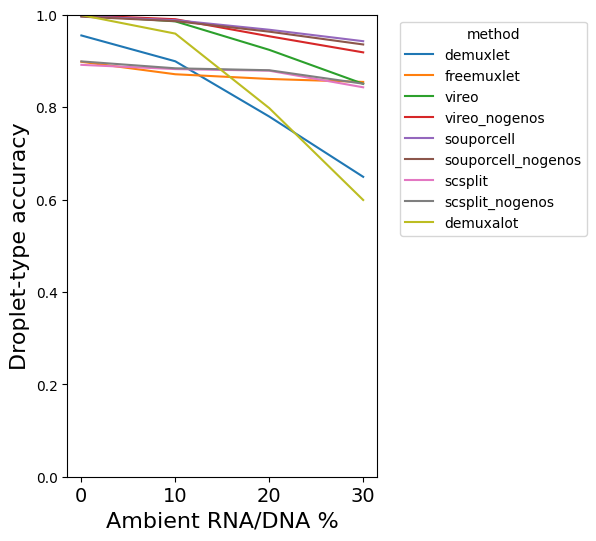

In [36]:
fig, ax = plt.subplots(1, figsize=(4, 6))

x_lab = 'amb_prop'
y_lab = 'value'
hue = 'method'

ax = sns.lineplot(data=final_doub_gex_drop, x=x_lab, y=y_lab, hue=hue)

ax.set_xlabel('Ambient RNA/DNA %', fontsize=16)
ax.set_ylabel('Droplet-type accuracy', fontsize=16)
ax.tick_params(axis='x', labelsize=14, labelrotation=0)
ax.set_ylim((0, 1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))

In [37]:
outdir = f'{projdir}/csv/final_figures/figure3/'

final_doub_gex_drop.to_csv(f'{outdir}/doub_gex_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_doub_atac_drop.to_csv(f'{outdir}/doub_atac_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_gex_drop.to_csv(f'{outdir}/mux_gex_drop_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_atac_drop.to_csv(f'{outdir}/mux_atac_drop_mean.csv.gz', sep='\t', header=True, index=True)

final_doub_gex_donor.to_csv(f'{outdir}/doub_gex_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_doub_atac_donor.to_csv(f'{outdir}/doub_atac_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_gex_donor.to_csv(f'{outdir}/mux_gex_donor_mean.csv.gz', sep='\t', header=True, index=True)
final_mux_atac_donor.to_csv(f'{outdir}/mux_atac_donor_mean.csv.gz', sep='\t', header=True, index=True)